In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("sp500_historical_data_cleaned.csv")
print(df.describe())

             Close         High          Low         Open        Volume
count  1535.000000  1535.000000  1535.000000  1535.000000  1.535000e+03
mean   4066.804645  4088.892397  4041.517055  4065.902456  4.246306e+09
std     892.126701   893.743214   890.620427   892.322155  1.021286e+09
min    2237.400000  2300.730000  2191.860000  2290.710000  1.296530e+09
25%    3288.710000  3305.885000  3269.920000  3286.915000  3.635455e+09
50%    4101.230000  4129.480000  4072.560000  4095.410000  4.007510e+09
75%    4536.645000  4558.390000  4516.745000  4540.705000  4.584180e+09
max    6118.710000  6128.180000  6088.740000  6121.430000  9.976520e+09


In [22]:
print(df.describe().round(3))


          Close      High       Low      Open        Volume
count  1535.000  1535.000  1535.000  1535.000  1.535000e+03
mean   4066.805  4088.892  4041.517  4065.902  4.246306e+09
std     892.127   893.743   890.620   892.322  1.021286e+09
min    2237.400  2300.730  2191.860  2290.710  1.296530e+09
25%    3288.710  3305.885  3269.920  3286.915  3.635455e+09
50%    4101.230  4129.480  4072.560  4095.410  4.007510e+09
75%    4536.645  4558.390  4516.745  4540.705  4.584180e+09
max    6118.710  6128.180  6088.740  6121.430  9.976520e+09


In [23]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())


        Date    Close     High      Low     Open      Volume
0 2019-01-02  2510.03  2519.49  2467.47  2476.96  3733160000
1 2019-01-03  2447.89  2493.14  2443.96  2491.92  3858830000
2 2019-01-04  2531.94  2538.07  2474.33  2474.33  4234140000
3 2019-01-07  2549.69  2566.16  2524.56  2535.61  4133120000
4 2019-01-08  2574.41  2579.82  2547.56  2568.11  4120060000


In [24]:
for col in df.columns:
    if col !="Date":
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

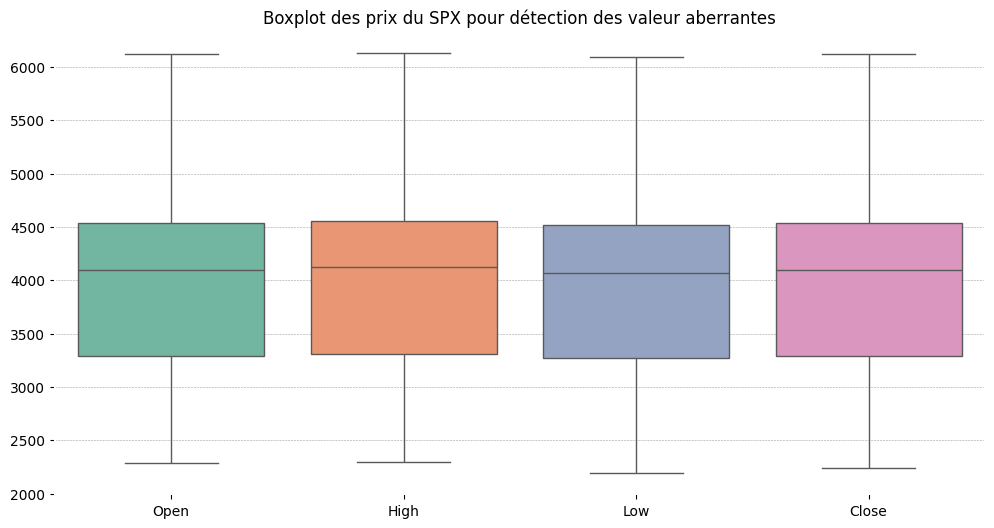

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open','High','Low','Close']], palette="Set2")
plt.title("Boxplot des prix du SPX pour détection des valeur aberrantes")
plt.show()

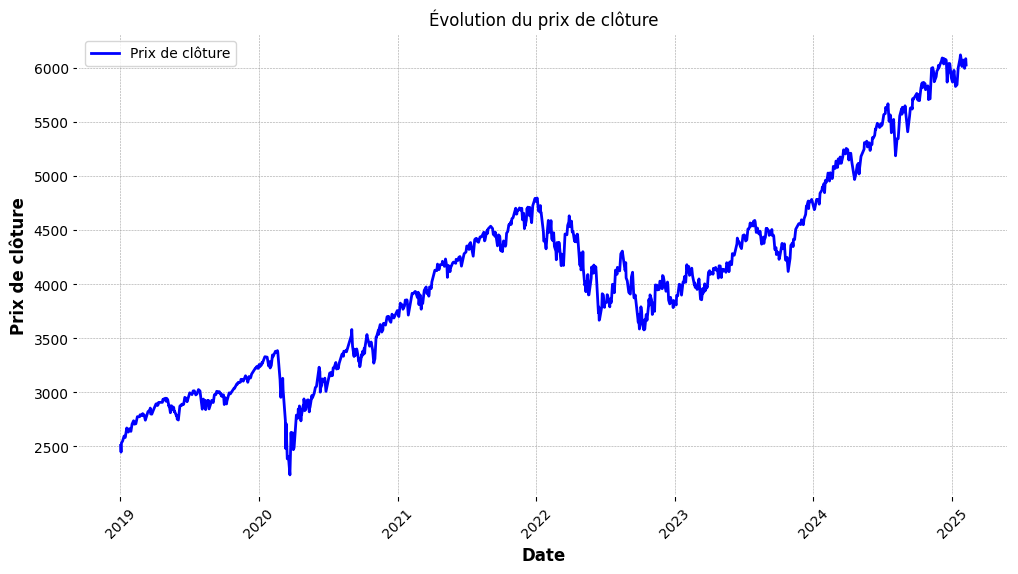

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Prix de clôture", color="blue")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.title("Évolution du prix de clôture")
plt.legend()
plt.xticks(rotation=45)
plt.show()


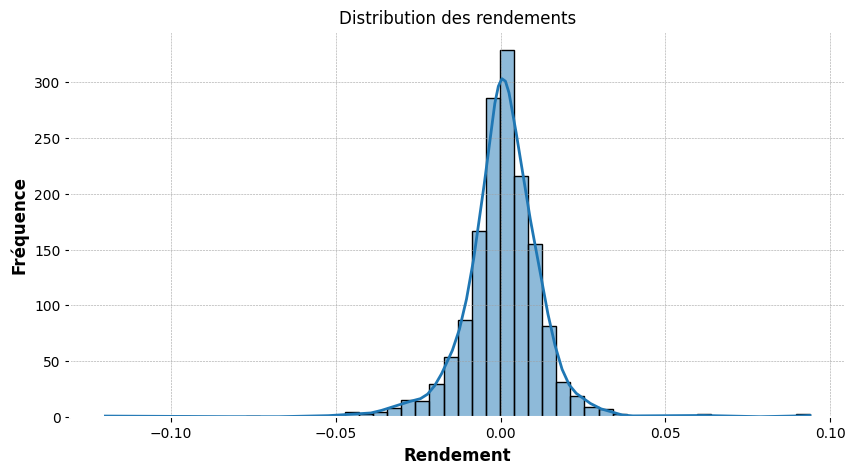

In [27]:
df['Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(df['Return'].dropna(), bins=50, kde=True)
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.title("Distribution des rendements")
plt.show()


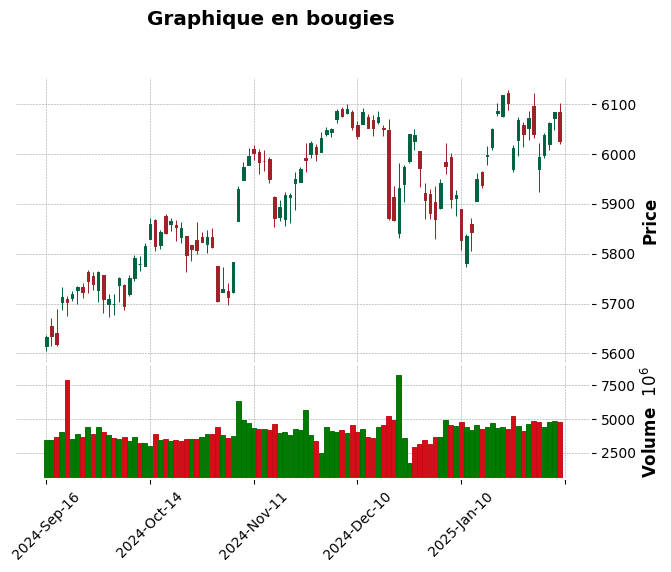

In [28]:
import mplfinance as mpf
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
mpf.plot(df.tail(100), type='candle', style='charles', volume=True, title="Graphique en bougies")


In [31]:
plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Close"], label="Prix de clôture", color="blue")
plt.plot(df["Date"], df["Open"], label="Prix d’ouverture", color="green", linestyle="dashed")
plt.fill_between(df["Date"], df["Low"], df["High"], color="gray", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix du S&P500 (Open, High, Low, Close)")
plt.legend()
plt.show()

KeyError: 'Date'

<Figure size 1500x600 with 0 Axes>

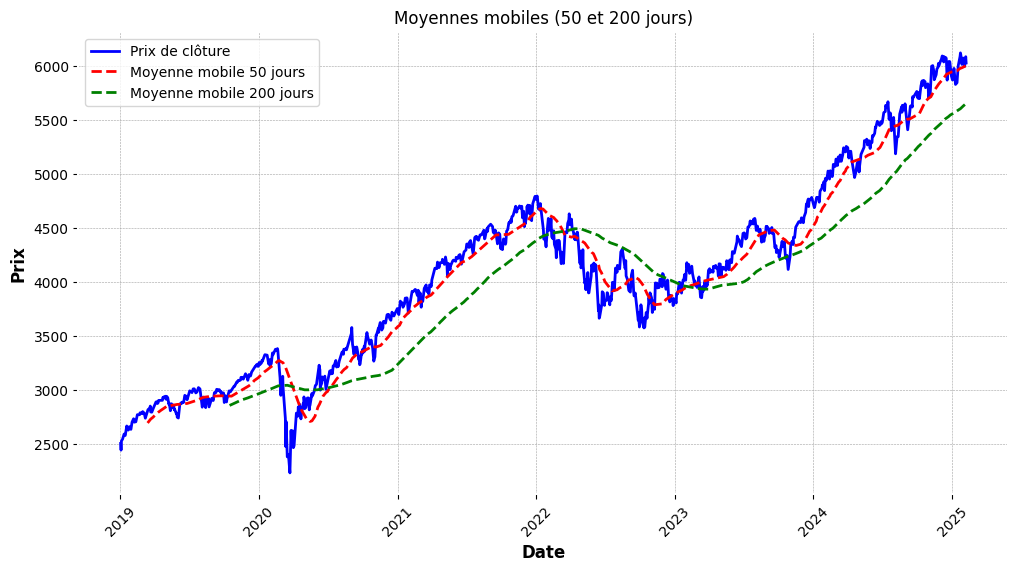

In [ ]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Prix de clôture", color="blue")
plt.plot(df['SMA_50'], label="Moyenne mobile 50 jours", linestyle="dashed", color="red")
plt.plot(df['SMA_200'], label="Moyenne mobile 200 jours", linestyle="dashed", color="green")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Prix")
plt.title("Moyennes mobiles (50 et 200 jours)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
volatility_annual = df['Daily_Return'].std() * (252 ** 0.5)
print(f"Volatilité annuelle : {volatility_annual:.3f}")


Volatilité annuelle : 0.200


In [ ]:
df['Month'] = df.index.to_period('M')
volatility_monthly = df.groupby('Month')['Daily_Return'].std() * (21 ** 0.5)
print(volatility_monthly)


Month
2019-01    0.054842
2019-02    0.023822
2019-03    0.033847
2019-04    0.017835
2019-05    0.040335
             ...   
2024-10    0.031786
2024-11    0.034951
2024-12    0.041179
2025-01    0.040541
2025-02    0.034535
Freq: M, Name: Daily_Return, Length: 74, dtype: float64
